# Introduction

- from the BERT embedding, we know king = queen + man - woman, can we do that in face emotions?



## How to repersent the triangles
- we use the angles to repersent the triangles.
- The length of the triangles will change becasue of scale but angles will not

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
import math
# Initialize dlib's face detector and load the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("sources/shape_predictor_68_face_landmarks.dat")

# Load the image

def calculate_angle(a, b, c):
    # Calculate the angle using the Law of Cosines
    return math.acos((a**2 + b**2 - c**2) / (2 * a * b))

# Function to display images in Jupyter Notebooks
def show_with_matplotlib(color_img, tri_img, color_title,tri_title):
    
    color_img_RGB = color_img[:, :, ::-1]
    
    tri_img_RGB = tri_img[:, :, ::-1]
    
    fig, axes = plt.subplots(1, 2)

    # Plot on the first subplot
    axes[0].imshow(color_img_RGB,cmap='viridis')
    axes[0].set_title(color_title)
    axes[0].set_xlabel('X axis')
    axes[0].set_ylabel('Y axis')
    
    # Plot on the second subplot
    axes[1].imshow(tri_img_RGB,cmap='viridis')
    axes[1].set_title(tri_title)
    axes[1].set_xlabel('X axis')
    axes[1].set_ylabel('Y axis')
    
    # Display the plot
    plt.show()


def calculate_angles_and_plot_face(faces,image1,gray,plot=True):
    
    image1 = image1.copy()
    angles = []
    for face in faces:
        landmarks = predictor(gray, face)
        points = []
        for n in range(0, 68):  # Dlib's 68 model points
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            points.append((x, y))
    
        # Define a rectangle and perform Delaunay triangulation
        rect = (0, 0, image1.shape[1], image1.shape[0])
        subdiv = cv2.Subdiv2D(rect)
        for point in points:
            subdiv.insert(point)
        triangleList = subdiv.getTriangleList()
        tripoints = []
        for t in triangleList:
            pt1 = (t[0], t[1])
            pt2 = (t[2], t[3])
            pt3 = (t[4], t[5])
            
            tripoints.append(np.array([t[0],t[1],t[2], t[3],t[4], t[5]]))
    
            # Vertices of the triangle (example coordinates)
            x1, y1 = pt1 
            x2, y2 = pt2 
            x3, y3 = pt3
            
            # Calculate the sides
            a = math.sqrt((x2 - x3)**2 + (y2 - y3)**2)
            b = math.sqrt((x1 - x3)**2 + (y1 - y3)**2)
            c = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            
            # Calculate the angles in radians
            angle_A = calculate_angle(b, c, a)
            angle_B = calculate_angle(a, c, b)
            angle_C = calculate_angle(a, b, c)
            
            angles.append(np.array([angle_A, angle_B, angle_C]))
            if plot:    
                cv2.line(image1, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (255, 0, 0), 1, cv2.LINE_AA)
                cv2.line(image1, (int(pt2[0]), int(pt2[1])), (int(pt3[0]), int(pt3[1])), (255, 0, 0), 1, cv2.LINE_AA)
                cv2.line(image1, (int(pt3[0]), int(pt3[1])), (int(pt1[0]), int(pt1[1])), (255, 0, 0), 1, cv2.LINE_AA)
        
    return tripoints, angles, image1

def images_triangle_points(path, plot=True):
    
    image = cv2.imread(path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = detector(gray)
    
    tripoints, angles, image_triangle = calculate_angles_and_plot_face(faces,image,gray=gray)
        
    show_with_matplotlib(image, image_triangle, "Orignal face","Face with Landmarks and Delaunay Triangulation")   
        
    return np.vstack(tripoints),np.vstack(angles)
       
# tripoints,angles=images_triangle_points(path="sources/sad.webp")
# tripoints.shape,angles.shape

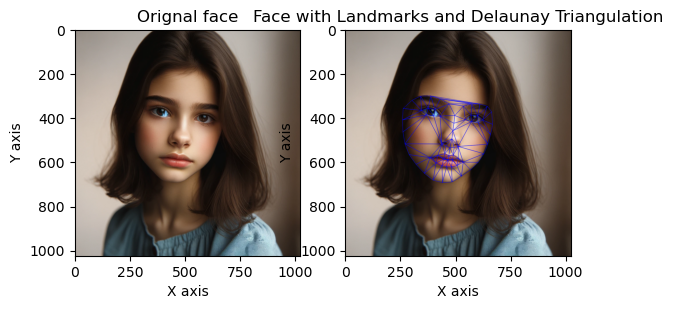

In [2]:
path = "sources/sad.webp"
tripoints_fs,angles_fs=images_triangle_points(path=path)

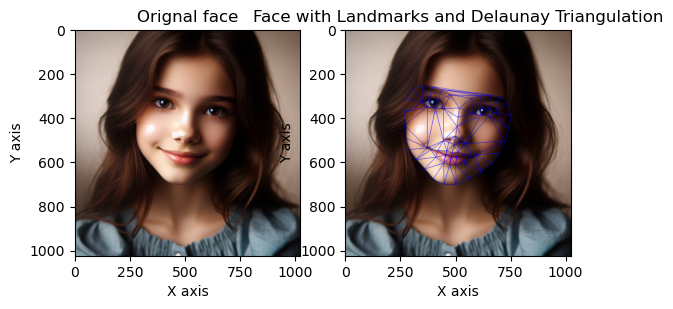

In [3]:
path = "sources/happy.webp"
tripoints_fh,angles_fh=images_triangle_points(path=path)

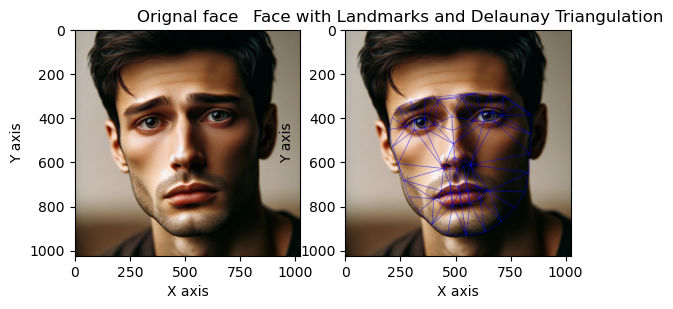

((111, 6), (111, 3))

In [4]:
path = "sources/male_sad.webp"
tripoints_ms,angles_ms=images_triangle_points(path=path)
tripoints_ms.shape,angles_ms.shape

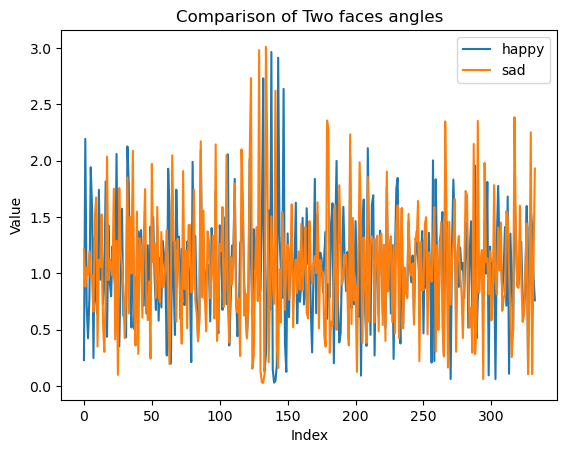

In [5]:
# Example data

# Create a figure and an axes.
fig, ax = plt.subplots()

# Plotting both lists
ax.plot(angles_fh.reshape(-1), label='happy')
ax.plot(angles_fs.reshape(-1), label='sad')

# Adding a legend to distinguish the lists
ax.legend()

# Adding titles and labels
ax.set_title('Comparison of Two faces angles')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Show the plot
plt.show()

### To transform one triangle into another in 2D space, we can use an affine transformation

In [6]:
# directyl copy the point to the target who doesn't change at all
delta_angles = angles_fs-angles_fh

In [7]:
delta_angles[abs(delta_angles)<0.07]# the angle change less than 0.5 degree

array([ 0.04928829, -0.03286943, -0.04534169,  0.03562939, -0.05376399,
        0.02535532, -0.05847091, -0.04173998, -0.01102371,  0.007692  ,
        0.00333171, -0.05325708, -0.02536836, -0.05570346, -0.03413224,
       -0.06368815,  0.05577584, -0.0504237 ,  0.03550031,  0.02423354,
       -0.05509315,  0.        , -0.01526313, -0.00389103,  0.00160701,
       -0.03931006,  0.03770305, -0.05466787, -0.01228499,  0.06695287,
        0.01038724,  0.0598797 ,  0.06929744, -0.00696883, -0.02932278,
        0.06465127,  0.04639277, -0.04060899,  0.00990283,  0.03876057,
       -0.00937232, -0.02938825, -0.02805779, -0.06027174])

## Construct the angles of happy men
- now we have delta_angles from a sad women to happy woman
- we add the delta_angles to the sad men and get the angles of happy men


In [8]:

angle_threshold = 0.07

point_mask = np.abs(delta_angles) > angle_threshold

expanded_point_mask = np.zeros((111, 6), dtype=bool)

expanded_point_mask[:, 0:2] = point_mask[:, 0, np.newaxis]  # For point A
expanded_point_mask[:, 2:4] = point_mask[:, 1, np.newaxis]  # For point B
expanded_point_mask[:, 4:6] = point_mask[:, 2, np.newaxis]
tripoints_mh = np.where(expanded_point_mask, -1, tripoints_ms)

consturcted_angles_mh = angles_ms - delta_angles

print(tripoints_mh)

[[ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1. 199. 451.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.]
 [492. 516. 586. 409.  -1.  -1.]
 [ -1.  -1.  -1.  -1. 649. 729.]
 [ -1.  -1

## Now we need to reconstruct the happy man from the consturcted_angle_mh and the sad man face
- Out function is like this: vector dot formular:
 $$ (x_i' \cdot x_j' + y_i' \cdot y_j') = \sqrt{(x_i'^2 + y_i'^2)} \cdot \sqrt{(x_j'^2 + y_j'^2)} \cdot \cos(\theta) $$
- It is not a linear function, we cannot use the least square method we have learned in the course(I feel sad about that)
- But we can use some sovler to solve this
- Objective:
 $$ \sum_{i,j \in P} \left( (x_i' \cdot x_j' + y_i' \cdot y_j') - \sqrt{(x_i'^2 + y_i'^2)} \cdot \sqrt{(x_j'^2 + y_j'^2)} \cdot \cos(\theta) \right)^2 $$

In [9]:
print((tripoints_mh<0).sum())
consturcted_angles_mh.shape

578


(111, 3)

In [10]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance
import math


angles_mh = consturcted_angles_mh
tripoints_mh_orignl = tripoints_mh.copy()
num_tris,_ = angles_mh.shape
# Define the function to compute angles from three points

import numpy as np
from scipy.optimize import minimize
# flag = True
def calculate_angle(p1, p2, p3):
    vec1 = p1 - p2
    vec2 = p3 - p2
    cos_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return np.arccos(np.clip(cos_angle, -1.0, 1.0))

def objective(vars):
    # nonlocal flag
    idx = 0
    total_error = 0
    tripoints_mh_local = tripoints_mh_orignl.copy()  # Use a local copy to avoid side-effects

    for i in range(num_tris):
        pts = tripoints_mh_local[i]
        for j in range(6):
            if pts[j] < 0:
                pts[j] = vars[idx]
                idx += 1

        a, b, c = np.array((pts[0], pts[1])), np.array((pts[2], pts[3])), np.array((pts[4], pts[5]))

        angles = np.array([calculate_angle(c, a, b), calculate_angle(a, b, c), calculate_angle(b, c, a)])

        total_error += np.sum((angles - angles_mh[i]) ** 2)
   
    return total_error

# Initial guess setup
initial_guess = tripoints_ms[tripoints_mh<0].reshape(-1).astype(np.float64)

# Optimization
result = minimize(objective, initial_guess, method='SLSQP', options={'eps': 1.0,'ftol': 1e-4})
print("final error:",result.fun)
if result.success:
    print("Optimization succeeded.")
    idx = 0
    reconstruct_tripoints_mh = []

    for i in range(num_tris):
        pts = tripoints_mh_orignl[i].copy()  # Make a copy to adjust based on optimization
        for j in range(6):
            if pts[j] < 0:
                pts[j] = result.x[idx]
                idx += 1

        reconstruct_tripoints_mh.append(pts)
        

else:
    print("Optimization failed:", result.message)
    



final error: 37.55034867518551
Optimization failed: Iteration limit reached


In [12]:


idx = 0
reconstruct_tripoints_mh = []

for i in range(num_tris):
    pts = tripoints_mh_orignl[i].copy()  # Make a copy to adjust based on optimization
    for j in range(6):
        if pts[j] < 0:
            pts[j] = result.x[idx]
            idx += 1

    reconstruct_tripoints_mh.append(pts)


Optimization succeeded.


In [13]:
reconstruct_tripoints_mh = np.array(reconstruct_tripoints_mh)
print(reconstruct_tripoints_mh)

[[246.94861 462.87384 267.03754 369.9293  320.61264 360.14175]
 [225.21317 338.50537 273.4494  448.52832 233.02942 395.50854]
 [465.7295  520.0303  462.39633 634.1919  370.3088  432.3308 ]
 [446.23514 636.4861  496.25876 522.29297 487.69373 558.9239 ]
 [218.01944 533.8218  199.      451.      274.64896 438.7694 ]
 [275.33514 648.49835 387.88596 635.9301  481.2591  750.13696]
 [440.24994 627.5725  270.82578 691.5038  239.05437 592.4952 ]
 [259.20544 680.6915  209.73378 526.8031  232.58508 604.70807]
 [223.18477 576.46014 220.56456 569.65283 321.90543 438.4288 ]
 [547.4726  697.96857 510.83847 628.475   528.29736 612.61383]
 [502.44534 635.617   559.0108  695.063   504.2068  699.28784]
 [567.75085 718.0465  522.3035  687.84753 613.55975 715.54095]
 [540.329   651.1473  533.4575  744.1892  549.10516 719.25006]
 [244.31905 761.7557  295.33313 695.1392  413.2961  742.4624 ]
 [454.69977 907.3102  480.0204  802.96173 564.5723  939.02155]
 [481.44614 779.40765 445.97263 936.5324  415.56165 885

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


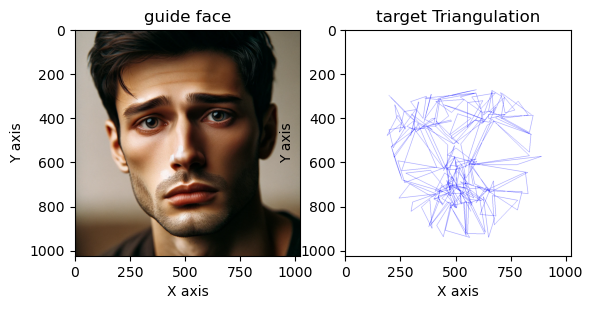

In [14]:
def example_plan_img(guide_img_path,reconstruct_tripoints):
    
    image = cv2.imread(guide_img_path)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = detector(gray)
    
    tripoints, angles, image_triangle = calculate_angles_and_plot_face(faces,image,gray=gray)
    
    canvas = np.ones(image.shape)
    
    for t in reconstruct_tripoints:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        cv2.line(canvas, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (255, 0, 0), 1, cv2.LINE_AA)
        cv2.line(canvas, (int(pt2[0]), int(pt2[1])), (int(pt3[0]), int(pt3[1])), (255, 0, 0), 1, cv2.LINE_AA)
        cv2.line(canvas, (int(pt3[0]), int(pt3[1])), (int(pt1[0]), int(pt1[1])), (255, 0, 0), 1, cv2.LINE_AA)
    
    show_with_matplotlib(image, canvas, "guide face","target Triangulation")
    return canvas

guide_img_path = "sources/male_sad.webp"    
canvas = example_plan_img(guide_img_path,reconstruct_tripoints_mh)    

## We first calculate the affine transformation matrix for each triangle based on the vertex positions before and after transformation.

In [15]:
import cv2

def find_affine_transform(src_points, dst_points):
    """ Calculate the affine transformation matrix from src to dst points """
    src = np.float32([src_points[0], src_points[1], src_points[2]]).reshape(-1, 2)
    dst = np.float32([dst_points[0], dst_points[1], dst_points[2]]).reshape(-1, 2)
    matrix = cv2.getAffineTransform(src, dst)
    return np.linalg.inv(np.vstack([matrix, [0, 0, 1]]))[:2]

tripoints_ms = tripoints_ms.reshape(-1,3,2)
tripoints_mh = reconstruct_tripoints_mh.reshape(-1,3,2)
print(tripoints_ms[45],tripoints_mh[45])
find_affine_transform(tripoints_ms[45],tripoints_mh[45])

[[361. 444.]
 [360. 404.]
 [405. 428.]] [[321.7245  461.92532]
 [393.01016 401.61337]
 [409.08133 399.27185]]


array([[ 3.38545977e+00,  4.01802267e+00, -2.58421173e+03],
       [ 1.92075295e+00,  2.93345131e+00, -1.52898870e+03]])

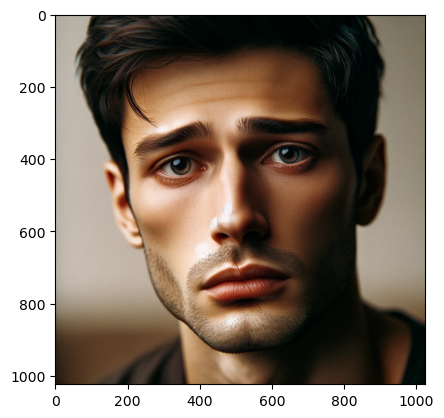

In [16]:


# Load original image
original_image = cv2.imread(guide_img_path)
height, width, channels = original_image.shape

# Create a target image with the same dimensions
target_image = np.zeros_like(original_image)

# Define triangles in both images
original_triangles =  tripoints_ms 
transformed_triangles = tripoints_mh 

# Process each triangle
for orig, trans in zip(original_triangles, transformed_triangles):
    # Calculate affine transformation matrix
    
    inverse_transform = find_affine_transform(orig, trans)
    
    # Create a mask for the triangle in the target image
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32([trans]), 1)
    # For each pixel in the mask
    for y in range(height):
        for x in range(width):
            if mask[y, x]:  # If pixel (x, y) is within the triangle
                # Transform this point back to the original image
                original_coord = np.dot(inverse_transform, np.array([x, y, 1]))
                orig_x, orig_y = original_coord[:2]
                
                # Check if the original coordinates are within image bounds
                if 0 <= orig_x < width and 0 <= orig_y < height:
                    # Interpolate pixel values from the original image
                    target_image[y, x] = cv2.getRectSubPix(original_image, (1, 1), (orig_x, orig_y))
                else:
                    # Optionally handle out-of-bounds coordinates
                    target_image[y, x] = [0, 0, 0]  # Example: set to black

# For areas not covered by any triangles, copy the original image
target_image[mask == 0] = original_image[mask == 0]

plt.imshow(target_image[:,:,::-1])


